In [2]:
from astropy.io import fits, ascii
from astropy.table import Table, vstack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from mpl_scatter_density import ScatterDensityArtist
import matplotlib.ticker as ticker
plt.rcParams.update({
    "font.family": "Times New Roman",  
    "text.usetex": True,
    'axes.labelsize':22,
    'xtick.labelsize':22,
    'ytick.labelsize':22,
    'figure.dpi':300})

plt.rcParams["text.antialiased"] = True

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
data=fits.open('ms_wd_original_data_from_Gaia_query.fits',memmap=True) 

data=Table(data[1].data).to_pandas()

data.dropna(inplace=True)

bprp=data['bp_rp'].values
G_abs=data['phot_g_mean_mag'].values + 5 + 5*np.log10(data['parallax'].values/1000)

target=pd.read_csv("ms_wd_topcat_selected_targets.csv")

bprp_target=target['bp_rp'].values
G_abs_target=target['phot_g_mean_mag'].values + 5 + 5*np.log10(target['parallax'].values/1000)

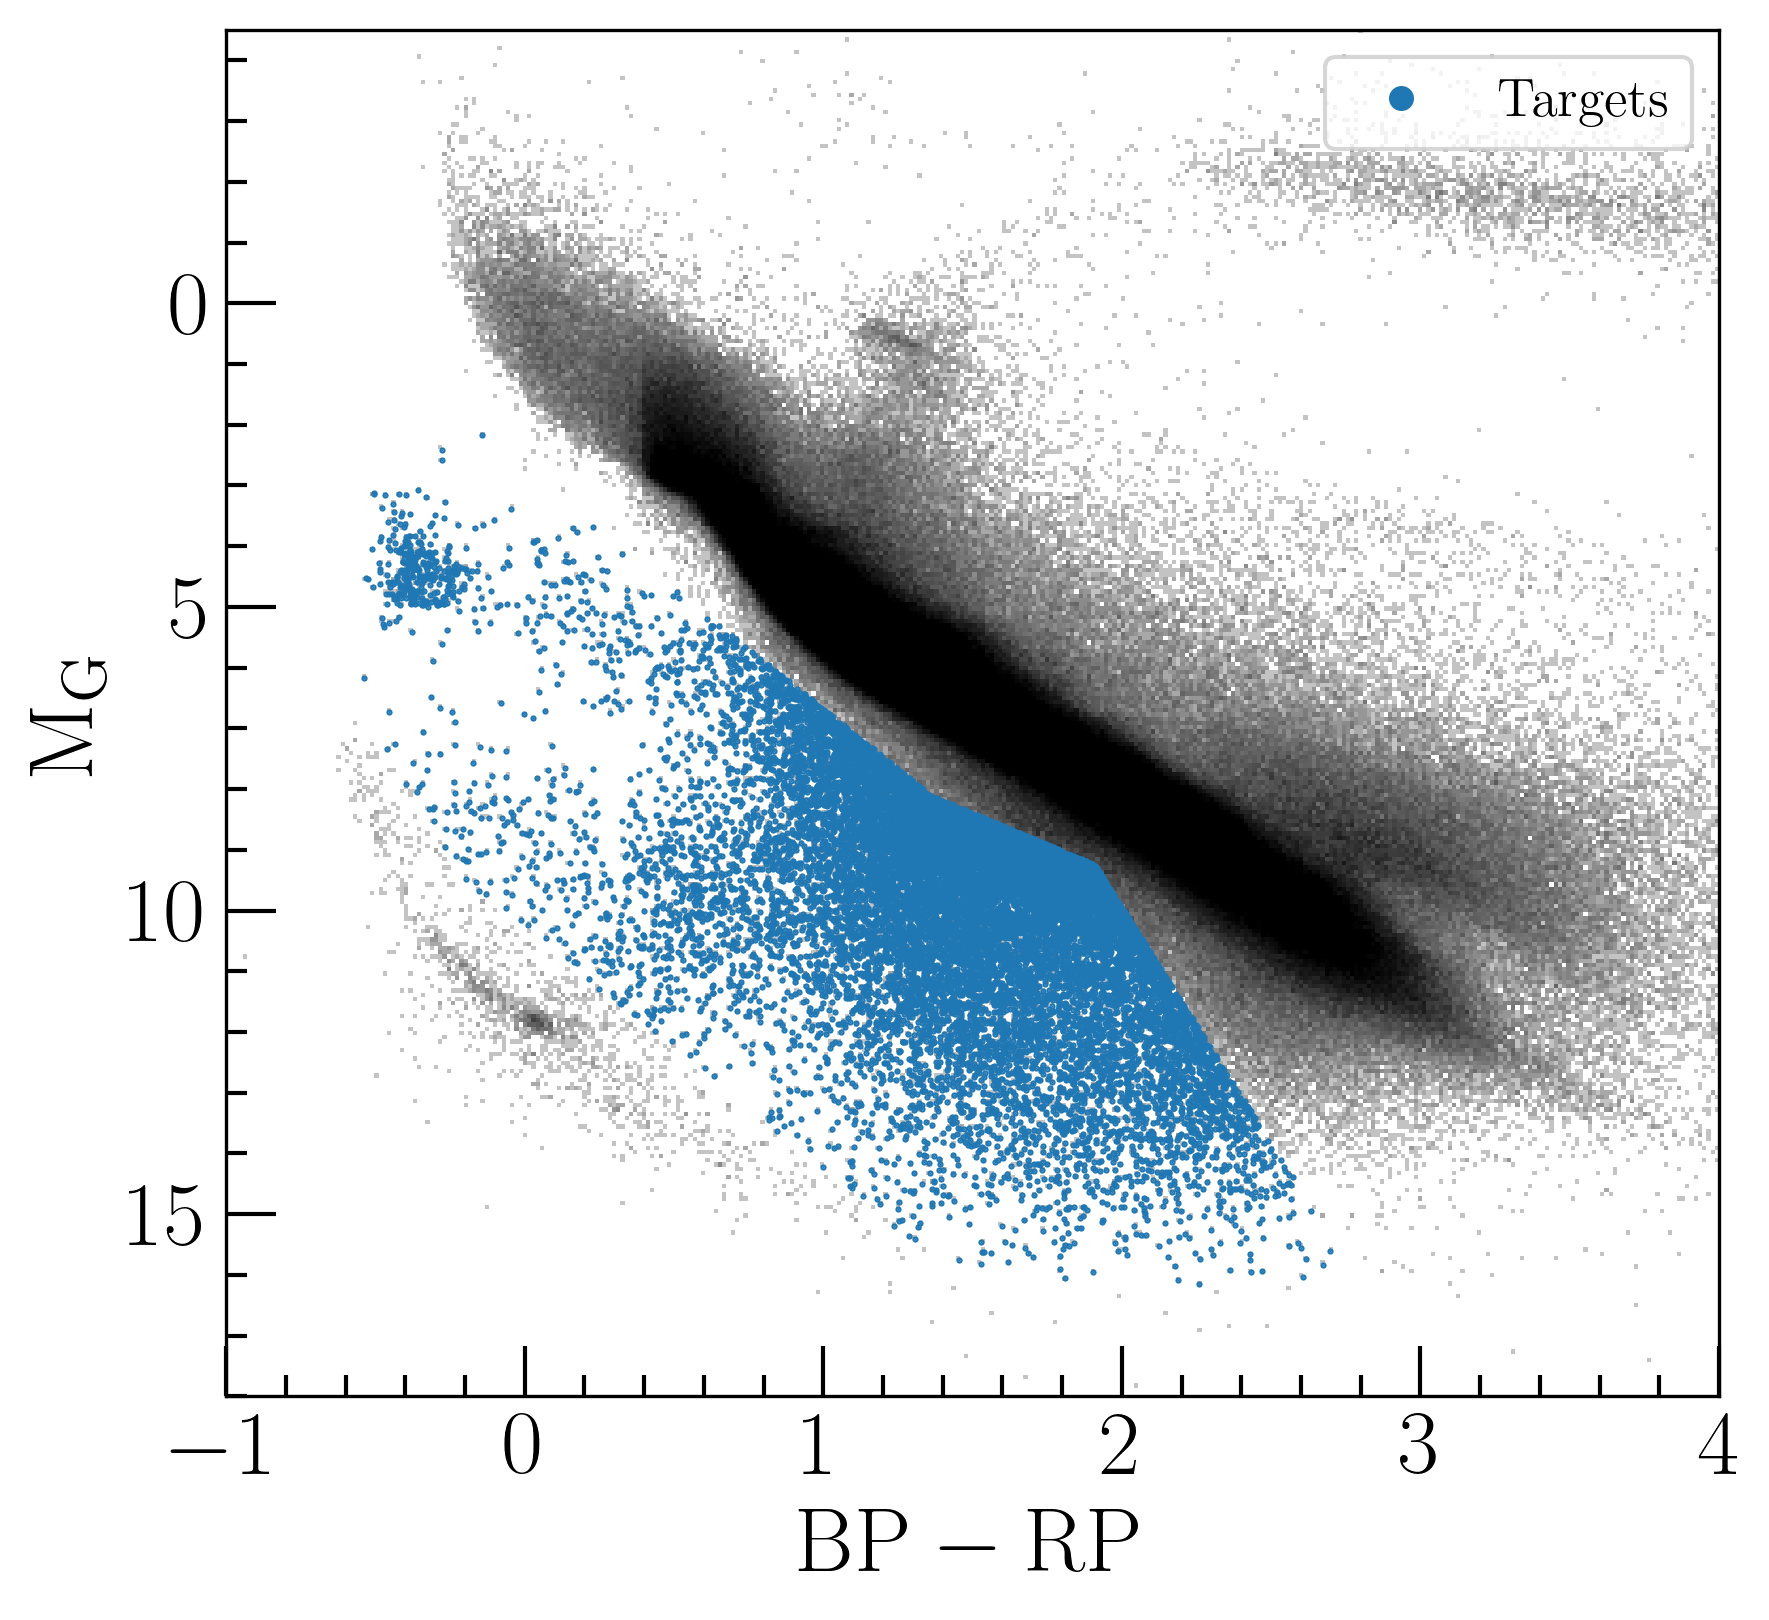

In [16]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=300, subplot_kw={'projection': 'scatter_density'})

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=100, stretch=LogStretch())


density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)


ax.plot(bprp_target, G_abs_target,'o', ms=0.5,label='Targets')



ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")


ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
plt.tick_params('both', length=12, width=1., which='major', direction='in')	
plt.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([18,-4.5])
ax.set_xlim([-1,4])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=13,markerscale=10)

plt.tight_layout()
# plt.savefig('CMD_targets_ms_wd.png',format='png',bbox_inches="tight")

In [34]:
data_targets=pd.read_csv("/Users/princy/Downloads/clustering_final_results_51features.csv")


bprp_target=data_targets['bp_rp'].values
G_abs_target=data_targets['phot_g_mean_mag'].values + 5 + 5*np.log10(data_targets['parallax'].values/1000)



In [35]:
potential_rrlyae=pd.read_csv("/Users/princy/Radboud/paper3_data/Gaia_plots/Potential_RRLyrae/Gaia_id.txt",header=None,)

In [36]:
potential_rrlyae.columns=['source_id']
criteria=pd.read_csv("rrlyrae_criteria.csv")
clean_=pd.merge(data_targets,criteria[criteria['clean']==True],on="source_id")
clean=pd.merge(clean_,potential_rrlyae,on="source_id")
potential_rrlyrae_data=pd.merge(data_targets,potential_rrlyae,on="source_id")

bprp_rr=potential_rrlyrae_data['bp_rp'].values
G_abs_rr=potential_rrlyrae_data['G_abs'].values

bprp_clean_rr=clean['bp_rp'].values
G_abs_clean_rr=clean['G_abs'].values

/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/princy/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


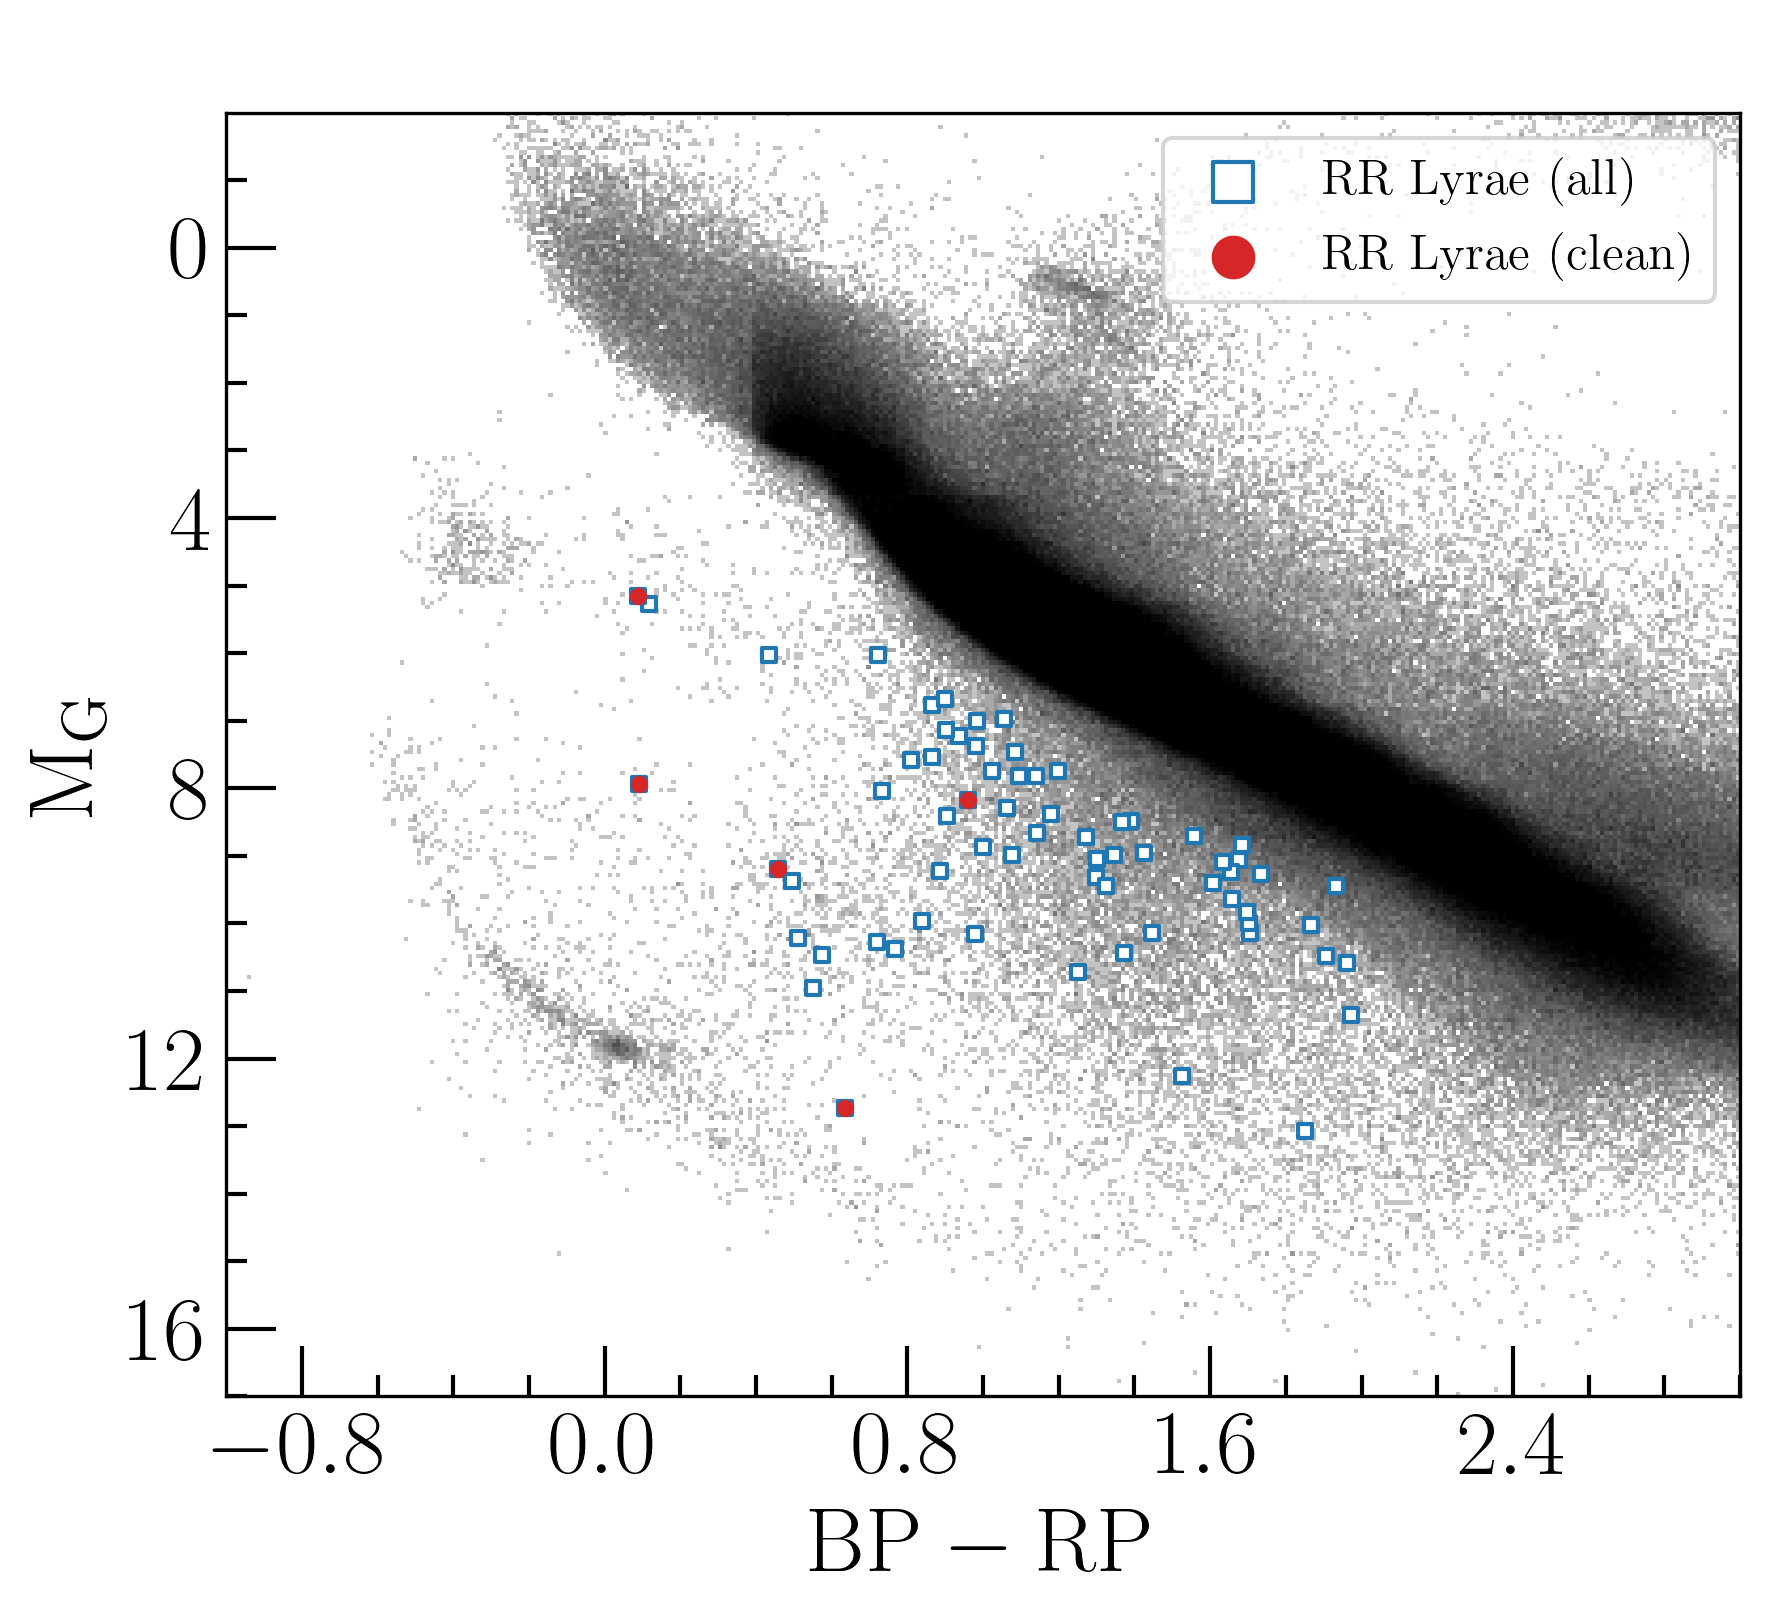

In [101]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=300, subplot_kw={'projection': 'scatter_density'})

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=100, stretch=LogStretch())

ax.set_title(" ",fontsize=20)

density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)

plt.scatter(bprp_rr,G_abs_rr,s=10,color="C0",marker='s',facecolor='white',label='RR Lyrae (all)')
plt.scatter(bprp_clean_rr,G_abs_clean_rr, s=10,color='C3',marker='o',label="RR Lyrae (clean)")


ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")


ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
plt.tick_params('both', length=12, width=1., which='major', direction='in')	
plt.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([17,-2])
ax.set_xlim([-1.,3])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=12,markerscale=3)

plt.tight_layout()
plt.savefig('CMD_Gaia_rrlyrae.png',format='png',bbox_inches="tight")



In [102]:
eb1=data_targets[(data_targets['label_name_gm_tsne70']=="EB1")&(data_targets['in_vari_eclipsing_binary']==True)]
eb2=data_targets[(data_targets['label_name_gm_tsne70']=="EB2")&(data_targets['in_vari_eclipsing_binary']==True)]
eb3=data_targets[(data_targets['label_name_gm_tsne70']=="EB3")&(data_targets['in_vari_eclipsing_binary']==True)]
ECL=data_targets[data_targets['in_vari_eclipsing_binary']==True]

rot1=data_targets[(data_targets['label_name_gm_tsne70']=="ROT1")]
rot2=data_targets[(data_targets['label_name_gm_tsne70']=="ROT2")]

rot=data_targets[data_targets['in_vari_rotation_modulation']==True]
hsd=data_targets[(data_targets['C0']==True)|(data_targets['C1']==True)]
CVs=data_targets[(data_targets['CVs']==True)]
WD=data_targets[(data_targets['WD_simbad']==True)]



In [117]:
sdb_sub=pd.read_csv("/Users/princy/Downloads/hsd_tsne_sub_clusters.csv")
CVs_lit=pd.read_csv("/Users/princy/Radboud/paper3_data/CVs_cluster_with_known_CVs.csv")


sdb_sub0=sdb_sub[sdb_sub['HSD Sub Cluster']==0]
sdb_sub1=sdb_sub[sdb_sub['HSD Sub Cluster']==1]

CVs_DN=CVs_lit[CVs_lit['Type_2']=="DN"]
CVs_mcvs=CVs_lit[CVs_lit['Type_2']=="mCV"]
CVs_nonmcvs=CVs_lit[CVs_lit['Type_2']=="non-mCVs"]

In [44]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

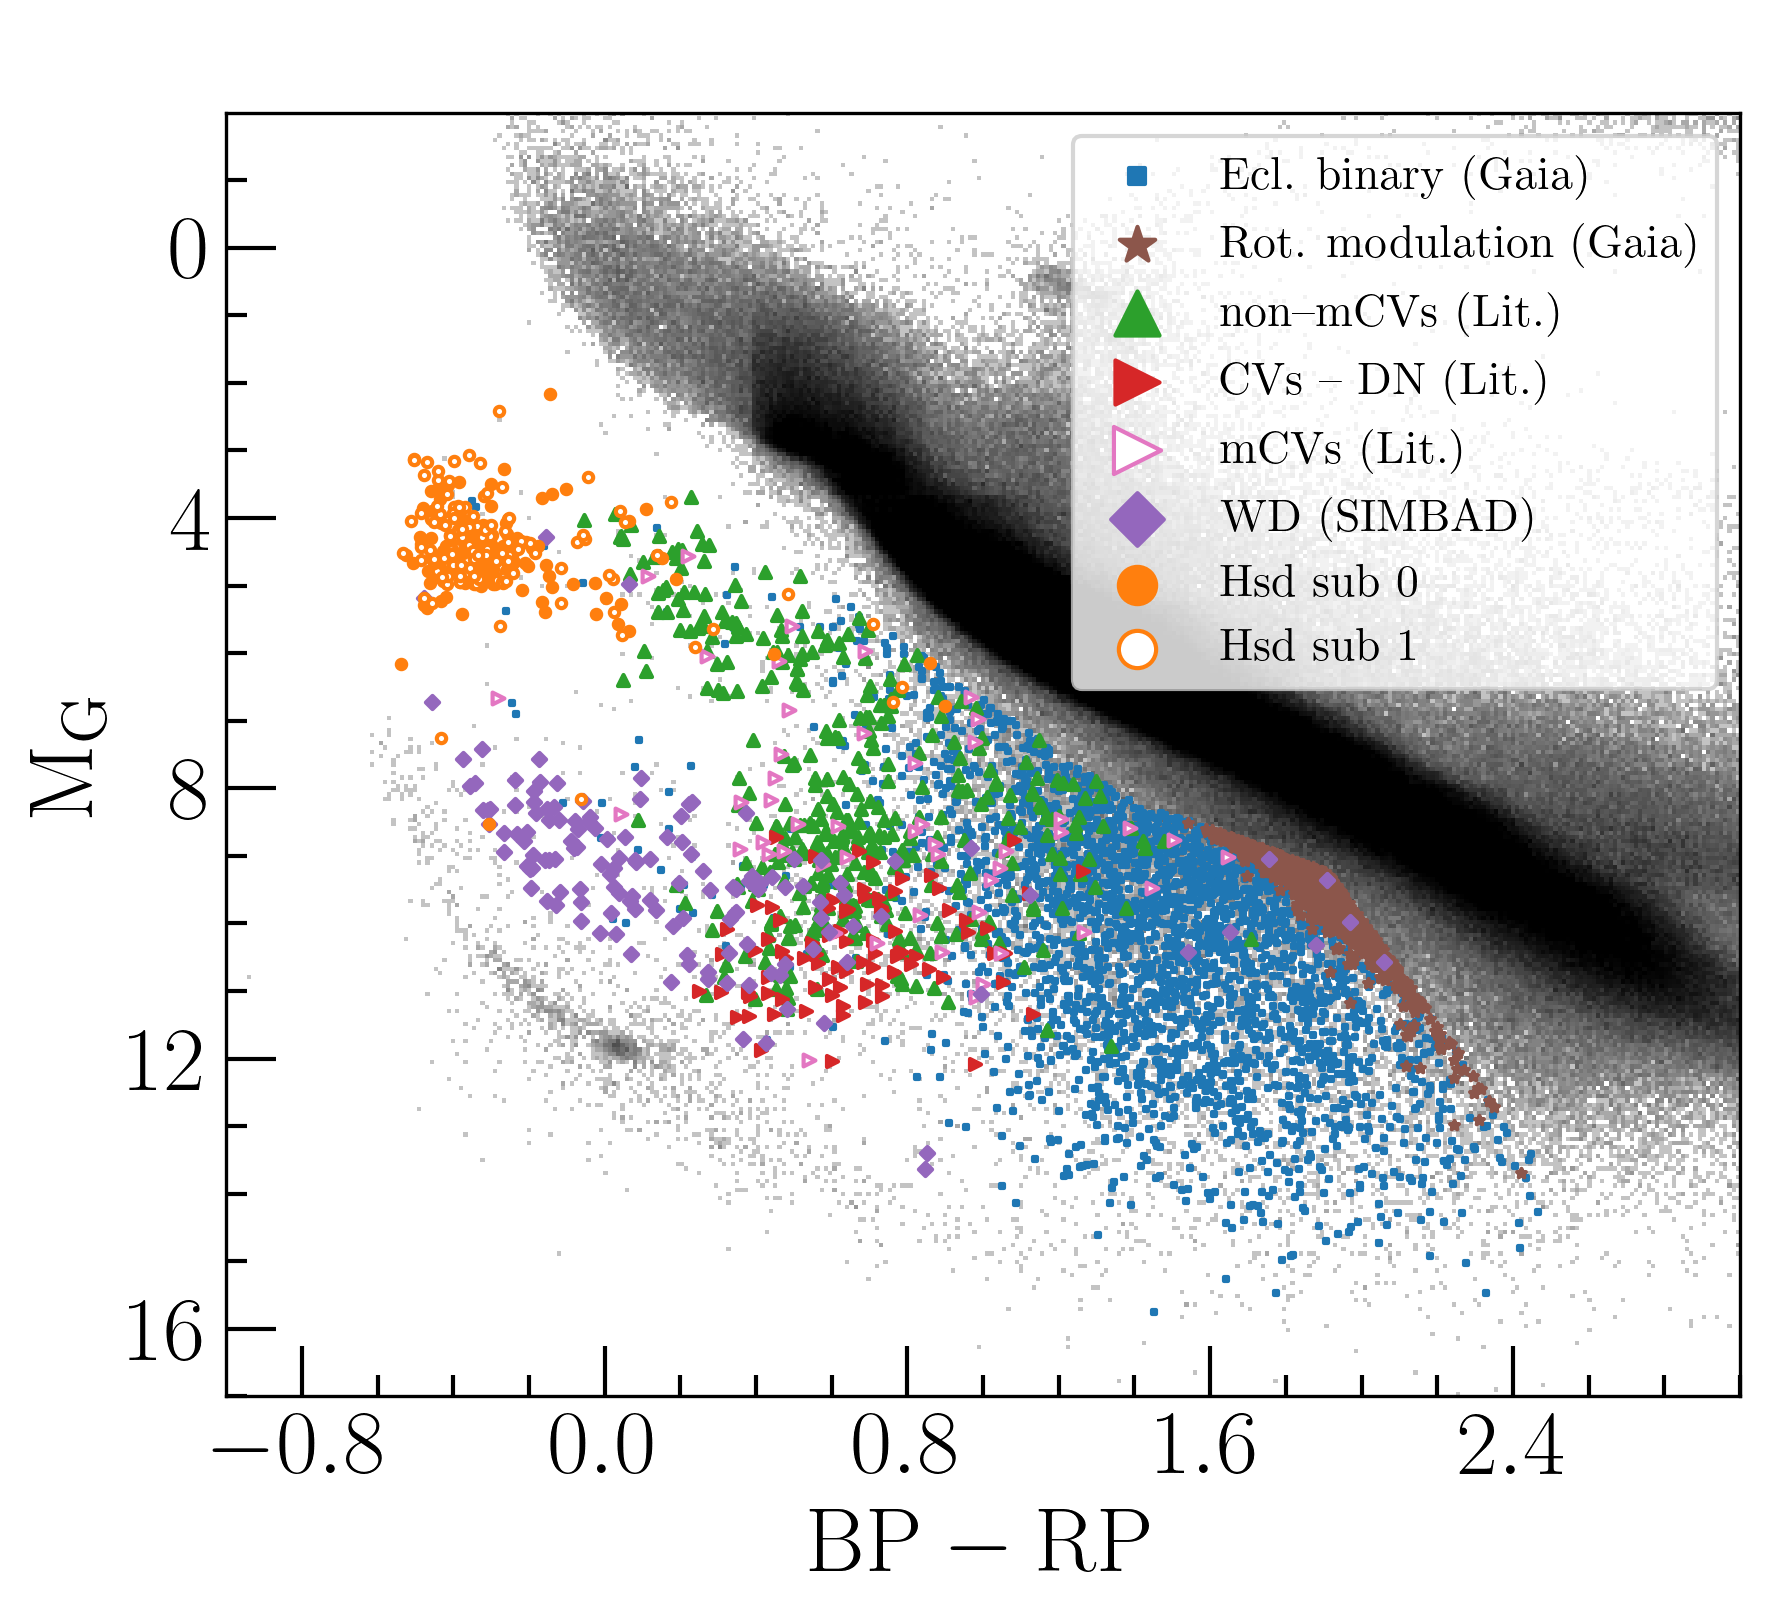

In [125]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=300, subplot_kw={'projection': 'scatter_density'})

ax.set_facecolor("white")


norm = ImageNormalize(vmin=0., vmax=100, stretch=LogStretch())

ax.set_title(" ",fontsize=20)

density = ax.scatter_density(bprp, G_abs, norm=norm, cmap="Greys", downres_factor=1)




plt.scatter(ECL['bp_rp'],ECL['G_abs'],s=1,color=color[0],marker='s',label='Ecl. binary (Gaia)')

# plt.scatter(eb2['bp_rp'].values,eb2['G_abs'].values,s=5,facecolor='white',edgecolor=color[1],marker='o',label='EB2')
# plt.scatter(eb3['bp_rp'].values,eb3['G_abs'].values,s=5,facecolor='white',edgecolor=color[2],marker='o',label='EB3')
# plt.scatter(eb1['bp_rp'].values,eb1['G_abs'].values,s=5,facecolor='white',edgecolor=color[3],marker='o',label='EB1')

# plt.scatter(rot1['bp_rp'].values,rot1['G_abs'].values,s=5,facecolor='white',edgecolor=color[6],marker='o',label='ROT2')
# plt.scatter(rot1['bp_rp'].values,rot1['G_abs'].values,s=5,facecolor='white',edgecolor=color[5],marker='o',label='ROT1')
plt.scatter(rot['bp_rp'].values,rot['G_abs'].values,s=5,color=color[5],marker='*',label='Rot. modulation (Gaia)')


plt.scatter(CVs_nonmcvs['bp_rp'].values,CVs_nonmcvs['G_abs'].values,s=7,color=color[2],marker='^',label='non–mCVs (Lit.)')
plt.scatter(CVs_DN['bp_rp'].values,CVs_DN['G_abs'].values,s=7,color=color[3],marker='>',label='CVs – DN (Lit.)')
plt.scatter(CVs_mcvs['bp_rp'].values,CVs_mcvs['G_abs'].values,s=8,color=color[6],marker='>',facecolor='white',label='mCVs (Lit.)')

plt.scatter(WD['bp_rp'].values,WD['G_abs'].values,s=5,color=color[4],marker='D',label='WD (SIMBAD)')

plt.scatter(sdb_sub0['bp_rp'].values,sdb_sub0['G_abs'].values,s=5,color=color[1],marker='o',label='Hsd sub 0')
plt.scatter(sdb_sub1['bp_rp'].values,sdb_sub1['G_abs'].values,s=5,color=color[1],marker='o',facecolor='white',label='Hsd sub 1')


ax.set_xlabel(r"$B_{p} - R_{p}$ \textbf{(mag)}")  
ax.set_ylabel(r"$M_{G}$ \textbf{(mag)}")


ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))



plt.minorticks_on()
plt.tick_params('both', length=12, width=1., which='major', direction='in')	
plt.tick_params('both', length=5, width=1, which='minor', direction='in')

ax.set_ylim([17,-2])
ax.set_xlim([-1.,3])
ax.set_xlabel(r'$\rm BP-RP$')
ax.set_ylabel(r'$\rm M_G$')

ax.legend(fontsize=11,markerscale=4)

plt.tight_layout()
plt.savefig('CMD_Gaia_ms_wd_per_objtype.png',format='png',bbox_inches="tight")



In [116]:
CVs_lit['Type_2'].value_counts()

Type_2
non-mCVs    385
DN           83
mCV          49
NL           13
UGSU          8
CV            5
UG            4
AM            2
AC            2
N?            1
Name: count, dtype: int64